In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

from matplotlib import rcParams
rcParams['axes.titlepad'] = 55
rcParams['font.weight'] ='bold'
rcParams['legend.fontsize'] = 26

In [2]:
nagpur_data = pd.read_csv("../data/computed_tropopause_data_NEW/nagpur_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "pre-monsoon", "monsoon", "winter", "post-monsoon"])
delhi_data = pd.read_csv("../data/computed_tropopause_data_NEW/delhi_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "pre-monsoon", "monsoon", "winter", "post-monsoon"])
guwahati_data = pd.read_csv("../data/computed_tropopause_data_NEW/guwahati_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "pre-monsoon", "monsoon", "winter", "post-monsoon"])
karaikal_data = pd.read_csv("../data/computed_tropopause_data_NEW/karaikal_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "pre-monsoon", "monsoon", "winter", "post-monsoon"])
mangalore_data = pd.read_csv("../data/computed_tropopause_data_NEW/mangalore_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "pre-monsoon", "monsoon", "winter", "post-monsoon"])

In [3]:
karaikal_data

Range  pre-monsoon  monsoon  winter  post-monsoon
0    80 - 90            0        0       0             0
1   90 - 100            4        0       3             1
2  100 - 150           34       33      12            19
3  150 - 200           18       59      24            37
4  200 - 250            8       10       9            10
5  250 - 300            8        3       4             4
6  300 - 350            3        2       1             3
7  350 - 400            2        1       0             0

In [4]:
# remove spaces from Range col
nagpur_data["Range"] = [x.replace(' ','') for x in nagpur_data["Range"].tolist()]
delhi_data["Range"] = [x.replace(' ','') for x in delhi_data["Range"].tolist()]
guwahati_data["Range"] = [x.replace(' ','') for x in guwahati_data["Range"].tolist()]
mangalore_data["Range"] = [x.replace(' ','') for x in mangalore_data["Range"].tolist()]
karaikal_data["Range"] = [x.replace(' ','') for x in karaikal_data["Range"].tolist()]

# # for Range col, convert "80 - 90" to "80"
# nagpur_data["Range"] = [x.split(' ')[0] for x in nagpur_data["Range"].tolist()]
# delhi_data["Range"] = [x.split(' ')[0] for x in delhi_data["Range"].tolist()]
# guwahati_data["Range"] = [x.split(' ')[0] for x in guwahati_data["Range"].tolist()]
# mangalore_data["Range"] = [x.split(' ')[0] for x in mangalore_data["Range"].tolist()]
# karaikal_data["Range"] = [x.split(' ')[0] for x in karaikal_data["Range"].tolist()]

In [5]:
karaikal_data

Range  pre-monsoon  monsoon  winter  post-monsoon
0    80-90            0        0       0             0
1   90-100            4        0       3             1
2  100-150           34       33      12            19
3  150-200           18       59      24            37
4  200-250            8       10       9            10
5  250-300            8        3       4             4
6  300-350            3        2       1             3
7  350-400            2        1       0             0

In [6]:
# convert absolute counts to %
for col in ['winter','pre-monsoon','monsoon','post-monsoon']:
    delhi_data[col] = delhi_data[col].div(delhi_data[col].sum()).multiply(100.0)
    nagpur_data[col] = nagpur_data[col].div(nagpur_data[col].sum()).multiply(100.0)    
    mangalore_data[col] = mangalore_data[col].div(mangalore_data[col].sum()).multiply(100.0)   
    karaikal_data[col] = karaikal_data[col].div(karaikal_data[col].sum()).multiply(100.0) 
    guwahati_data[col] = guwahati_data[col].div(guwahati_data[col].sum()).multiply(100.0) 

In [7]:
delhi_data

Range  pre-monsoon    monsoon     winter  post-monsoon
0    80-90    14.285714   0.645161   3.035714      1.851852
1   90-100    16.046967   5.806452  13.750000     21.296296
2  100-150    16.242661  27.741935  19.642857     37.962963
3  150-200    18.786693  35.483871  11.607143     11.111111
4  200-250    16.438356  24.516129  18.928571     12.037037
5  250-300    12.133072   3.870968  19.821429     10.185185
6  300-350     5.479452   0.645161  10.535714      4.629630
7  350-400     0.587084   1.290323   2.678571      0.925926

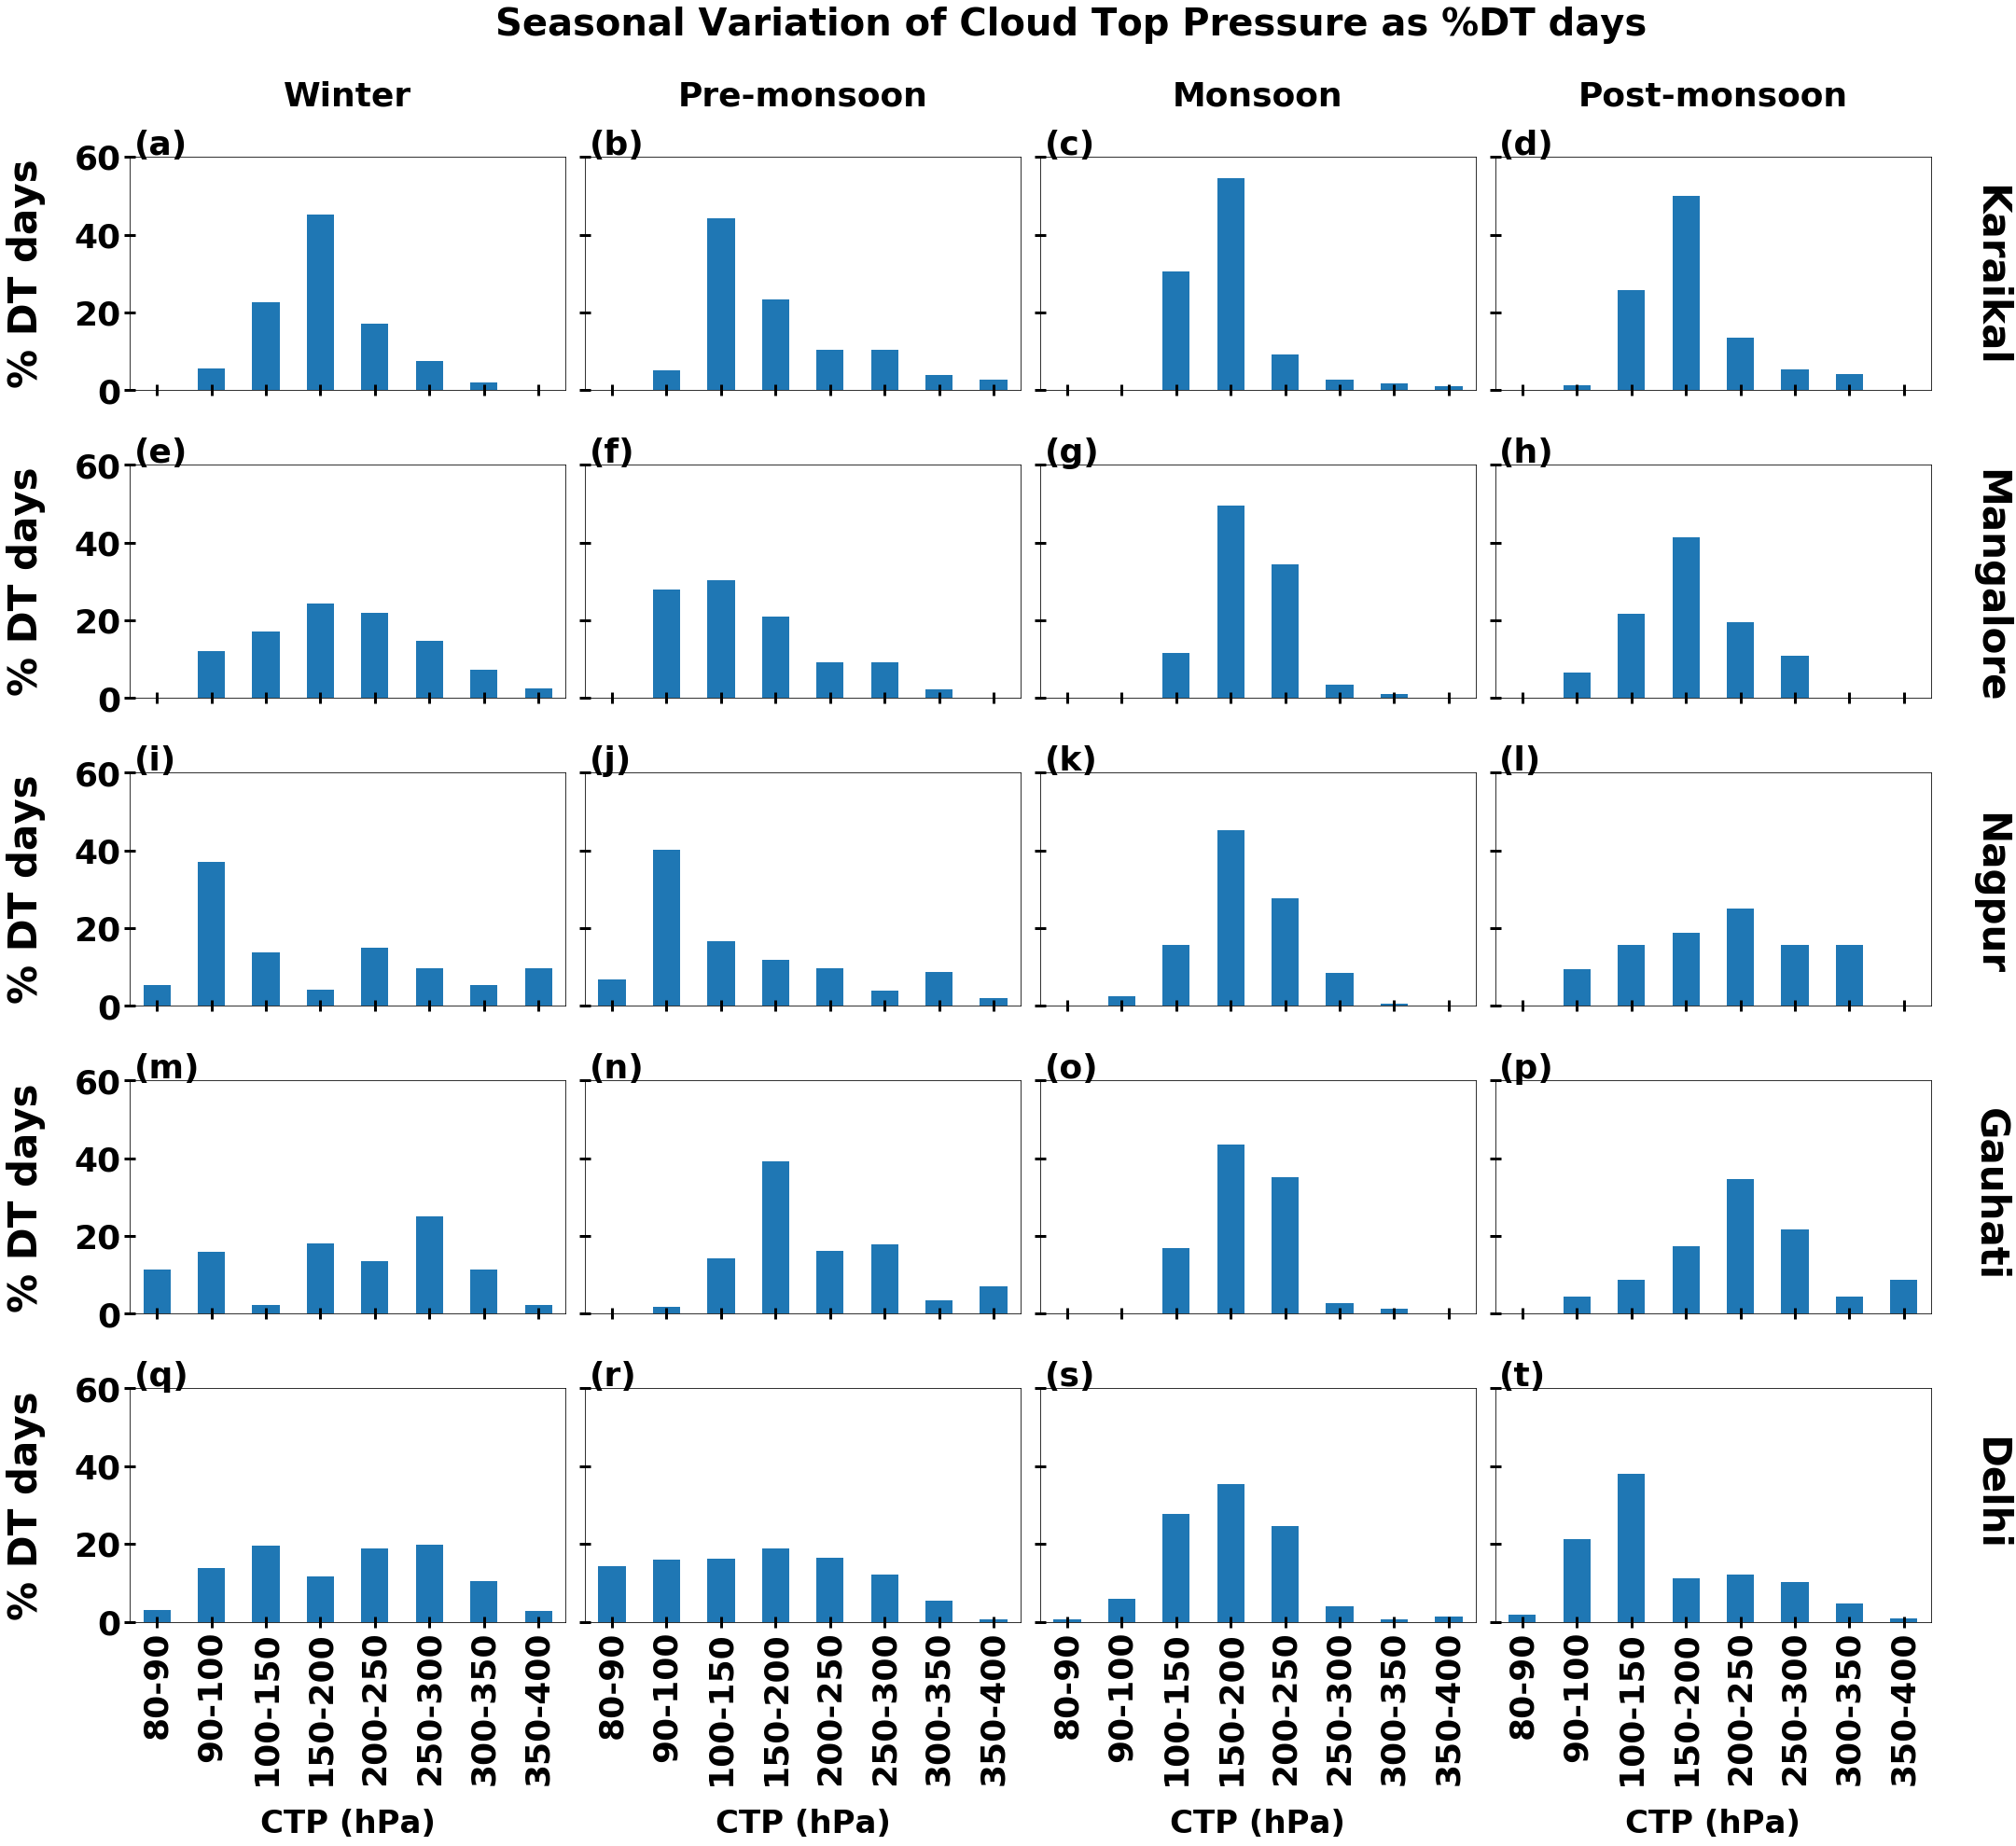

In [10]:
# http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb
# https://stackoverflow.com/questions/21962508/stuffing-a-pandas-dataframe-plot-into-a-matplotlib-subplot?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

fig, axes = plt.subplots(nrows=5, ncols=4, sharex='col', figsize=(32, 28))

labels = ["(a)", "(b)", "(c)", "(d)"]
for i, season in enumerate(['winter','pre-monsoon','monsoon','post-monsoon']):
    karaikal_data.plot.bar(legend=None, sharey=True, x="Range", y=season, ax=axes[0,i], yticks=np.arange(0, 80, 20))
    axes[0,i].set_title(season.capitalize(), fontsize=36, fontweight='bold')
    axes[0,i].set_xticklabels(axes[0,i].get_xticklabels(), rotation=30, fontsize=22)
    axes[0,i].tick_params(labelsize=36, axis='y')
    axes[0,i].tick_params(direction='inout', length=12, width=3, colors='black')
#     axes[0,i].set_ylabel("Karaikal", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[0,i].set_ylabel("% DT days", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    plt.text(0.01, 1.01, labels[i], horizontalalignment='left', fontsize=36,
         transform=axes[0,i].transAxes, fontweight='bold')
    if i == 3:
        plt.text(1.18, 0.75, "Karaikal", horizontalalignment='right', fontsize=42,
                 transform=axes[0,i].transAxes, fontweight='bold', rotation=-90)

labels = ["(e)", "(f)", "(g)", "(h)"]
for i, season in enumerate(['winter','pre-monsoon','monsoon','post-monsoon']):
    mangalore_data.plot.bar(legend=None, sharey=True, x="Range", y=season, ax=axes[1,i], yticks=np.arange(0, 80, 20))
#     axes[1,i].set_title('Mangalore', fontsize=36)
    axes[1,i].set_xticklabels(axes[1,i].get_xticklabels(), rotation=30, fontsize=22)
    axes[1,i].tick_params(labelsize=36, axis='y')
    axes[1,i].tick_params(direction='inout', length=12, width=3, colors='black')
#     axes[1,i].set_ylabel("Mangalore", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[1,i].set_ylabel("% DT days", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    plt.text(0.01, 1.01, labels[i], horizontalalignment='left', fontsize=36,
         transform=axes[1,i].transAxes, fontweight='bold')
    if i == 3:
        plt.text(1.18, 0.85, "Mangalore", horizontalalignment='right', fontsize=42,
                 transform=axes[1,i].transAxes, fontweight='bold', rotation=-90)

labels = ["(i)", "(j)", "(k)", "(l)"]
for i, season in enumerate(['winter','pre-monsoon','monsoon','post-monsoon']):
    nagpur_data.plot.bar(legend=None, sharey=True, x="Range", y=season, ax=axes[2,i], yticks=np.arange(0, 80, 20))
#     axes[2,i].set_title('Nagpur', fontsize=36)
    axes[2,i].set_xticklabels(axes[2,i].get_xticklabels(), rotation=30, fontsize=22)
    axes[2,i].tick_params(labelsize=36, axis='y')
    axes[2,i].tick_params(direction='inout', length=12, width=3, colors='black')
#     axes[2,i].set_ylabel("Nagpur", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[2,i].set_ylabel("% DT days", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    plt.text(0.01, 1.01, labels[i], horizontalalignment='left', fontsize=36,
         transform=axes[2,i].transAxes, fontweight='bold')
    if i == 3:
        plt.text(1.18, 0.70, "Nagpur", horizontalalignment='right', fontsize=42,
                 transform=axes[2,i].transAxes, fontweight='bold', rotation=-90)

labels = ["(m)", "(n)", "(o)", "(p)"]
for i, season in enumerate(['winter','pre-monsoon','monsoon','post-monsoon']):
    guwahati_data.plot.bar(legend=None, sharey=True, x="Range", y=season, ax=axes[3,i], yticks=np.arange(0, 80, 20))
#     axes[3,i].set_title('Gauhati', fontsize=36)
    axes[3,i].set_xticklabels(axes[3,i].get_xticklabels(), rotation=30, fontsize=22)
    axes[3,i].tick_params(labelsize=36, axis='y')
    axes[3,i].tick_params(direction='inout', length=12, width=3, colors='black')
#     axes[3,i].set_ylabel("Gauhati", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[3,i].set_ylabel("% DT days", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    plt.text(0.01, 1.01, labels[i], horizontalalignment='left', fontsize=36,
            transform=axes[3,i].transAxes, fontweight='bold')
    if i == 3:
        plt.text(1.18, 0.75, "Gauhati", horizontalalignment='right', fontsize=42,
                 transform=axes[3,i].transAxes, fontweight='bold', rotation=-90)

labels = ["(q)", "(r)", "(s)", "(t)"]
for i, season in enumerate(['winter','pre-monsoon','monsoon','post-monsoon']):
    delhi_data.plot.bar(legend=None, sharey=True, x="Range", y=season, ax=axes[4,i], yticks=np.arange(0, 80, 20))
#     axes[4,i].set_title('Delhi', fontsize=36)
    axes[4,i].set_xticklabels(axes[4,i].get_xticklabels(), fontsize=22, rotation=90)
    axes[4,i].tick_params(labelsize=36, axis='both')
    axes[4,i].tick_params(direction='inout', length=12, width=3, colors='black')
#     axes[4,i].set_ylabel("Delhi", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[4,i].set_ylabel("% DT days", rotation=90, fontsize=42, labelpad=30, fontweight='bold')
    axes[4,i].set_xlabel("CTP (hPa)", fontsize=34, labelpad=25, fontweight='bold')
    plt.text(0.01, 1.01, labels[i], horizontalalignment='left', fontsize=36,
         transform=axes[4,i].transAxes, fontweight='bold')
    if i == 3:
        plt.text(1.18, 0.55, "Delhi", horizontalalignment='right', verticalalignment='center', fontsize=42,
                 transform=axes[4,i].transAxes, fontweight='bold', rotation=-90)
    
plt.suptitle('Seasonal Variation of Cloud Top Pressure as %DT days', fontsize=40, fontweight='bold')
plt.tight_layout()
fig.subplots_adjust(top=0.90, hspace=0.32, right=0.9)
# fig.autofmt_xdate()
plt.savefig("../plots/seasonal_ctp_NEW.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
# plt.show()

In [9]:
gc.collect()

311